In [1]:
def needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with gap penalties
    for i in range(len(seq1) + 1):
        matrix[i][0] = i * gap_penalty
    for j in range(len(seq2) + 1):
        matrix[0][j] = j * gap_penalty

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1][j] + gap_penalty
            insert = matrix[i][j - 1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Example usage
seq1 = "ACGT"
seq2 = "AGT"
match_score = 1
mismatch_score = -1
gap_penalty = -1

alignment_matrix = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)


In [2]:
for row in alignment_matrix:
    print(row)

[0, -1, -2, -3]
[-1, 1, 0, -1]
[-2, 0, 0, -1]
[-3, -1, 1, 0]
[-4, -2, 0, 2]


In [3]:
def smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with zeros
    for i in range(len(seq1) + 1):
        matrix[i][0] = 0
    for j in range(len(seq2) + 1):
        matrix[0][j] = 0

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = max(matrix[i - 1][j] + gap_penalty, 0)
            insert = max(matrix[i][j - 1] + gap_penalty, 0)
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Example usage
seq1 = "ACGT"
seq2 = "AGT"
match_score = 1
mismatch_score = -1
gap_penalty = -1

alignment_matrix = smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)


In [4]:
for row in alignment_matrix:
    print(row)

[0, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 2]


In [6]:
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score



In [8]:
dataset_sizes = [100, 500, 1000, 5000]

# Initialize lists to store execution times
nw_execution_times = []
sw_execution_times = []

for size in dataset_sizes:
    # Generate random sequences
    seq1 = np.random.choice(["A", "C", "G", "T"], size=size)
    seq2 = np.random.choice(["A", "C", "G", "T"], size=size)

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Print execution times
print("Execution Times (in seconds):")
for size, nw_time, sw_time in zip(dataset_sizes, nw_execution_times, sw_execution_times):
    print(f"Dataset Size: {size}\tNW Time: {nw_time:.4f}\tSW Time: {sw_time:.4f}")


Execution Times (in seconds):
Dataset Size: 100	NW Time: 0.0112	SW Time: 0.0184
Dataset Size: 500	NW Time: 0.2305	SW Time: 0.2451
Dataset Size: 1000	NW Time: 0.8631	SW Time: 1.0375
Dataset Size: 5000	NW Time: 21.6192	SW Time: 25.7829


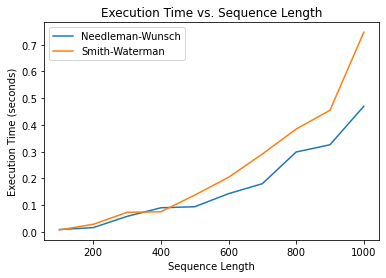

In [9]:
import time
import matplotlib.pyplot as plt

# Initialize variables
sequence_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
match_score = 1
mismatch_score = -1
gap_penalty = -1
nw_execution_times = []
sw_execution_times = []

# Run the algorithms and measure execution time
for length in sequence_lengths:
    # Generate random sequences of given length
    seq1 = "A" * length
    seq2 = "C" * length

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Plot Execution Time vs. Sequence Length
plt.plot(sequence_lengths, nw_execution_times, label="Needleman-Wunsch")
plt.plot(sequence_lengths, sw_execution_times, label="Smith-Waterman")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Execution Time vs. Sequence Length")
plt.show()

In [13]:
fasta_file = "C:\\Users\\bnand\\Documents\\SEM 4\\BIO\\BOPP01000041.1 Gryllus bimaculatus .fasta"  # Replace with the actual path to your downloaded FASTA file

def read_fasta(file_path):
    sequences = []
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if sequences:
                    yield sequences
                    sequences = []
            else:
                sequences.append(line)
        if sequences:
            yield sequences

def print_sequences(sequences):
    for i, sequence in enumerate(sequences):
        print(f"Sequence {i+1}: {sequence}")
    print("--------------------------------------")

batch_size = 10  # Adjust the batch size as needed

# Read the FASTA file in batches and print the sequences
fasta_sequences = read_fasta(fasta_file)
for batch in fasta_sequences:
    print_sequences(batch)


Sequence 1: ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA
Sequence 2: CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC
Sequence 3: GGCCCCGACTTCTACATCCACGTCTTCGACGTCTACCACGGAGACGACGACGGCCACAACGGAGGAGGAG
Sequence 4: CTCCCCACGACAACGAGCCCGGAGACTGAATCGCCGTCGACGAATTTTCCTGTAACTGAACCTCCTGGCA
Sequence 5: CTTTACCACAGTTAAATTCGTCGGTTTTGCCTGACGAAGGTGGAAATGCTTGCATTTTTGCGAGTTTAAA
Sequence 6: AATTAAATTGCTGATTCCGTATCGCAATACTTTGGATCAGGTGAGTGAACTTTGAATAATAAAAAAGGTA
Sequence 7: CAGTCTGTATACTCATAGTTATATTTGTATGTAGTTGACGTAGAAGGAGGGAGAGGAAGGGAGGTATGTA
Sequence 8: TTGTTTCATTACTCTCTCTTTTTTGTCATTTTGCCCAGCTTTGGTCGTGTTTTTTTGGAACTCGAATTTT
Sequence 9: TAGCCAATAACACTTCAATTTACTTGATGTTTGGAGACTCTAGCTTTGGTTTTAGTTAATATCAGGGCGT
Sequence 10: GAGCATACCTACGCTTTCTCAGGGTACTATACTCTACTTCGGGTACCTGAAAATAGCACTCAGACGAGTA
Sequence 11: TTTGGGTGGTAAATAATTTGATTTTCGTTAGGATATATTTGTTACAATTTTTACTGATAAATTAAACAAT
Sequence 12: TTACAAATTTTGTGTATGAATTTTCAGCGACATTAAATGTCGGCTTCCACAATTAATTTAATCAGTTTCT
S

Sequence 3993: AAATATTTGTAATTTTAAACAATTACAAAAACAAGATTTTCTCAAAAACGGTTCAAAAATTTGTTCTTTA
Sequence 3994: TACTTTTAGTAGGGACAGTACTAAATGCACTCTATAAGATGACATAAAATTGTTTTTTTCAAAAATGACA
Sequence 3995: AAAAAATATTTTTTTACTTGTCTCTCACGTAGTTAATATTTACTTTAGCAACAAATTTGTTTACATTATT
Sequence 3996: ATACTAATTGTCCTTCATTCCATTTTTTCAAAAACGGTTCCAAATTTTTGCTTCAAACCTTTCGAATGTG
Sequence 3997: TAGTGCTATTGCACTCTTTAGTATGATGTAAAGTTCATTGCGGAGCTCTCTTTTCAATAATTGCACAAAT
Sequence 3998: GTAATTTATTTGAAAGATCTTTCACGCCATTTTATGCACATTTCCAGGAATTTGTAAACACTATTGTATA
Sequence 3999: TGTGAGTTAATGTGCTTCAAATGACTCAAATGAAGTTTTTCGAAATCTCAAAAATGTTATGTGAAAAAGT
Sequence 4000: TTCAAATTTCGAATTTACACTAGCGCTTAAGCGTCATTTTCGTAAAAGAGACTCCGAATTTTTCAAAGAA
Sequence 4001: AATTGTTATTGAGCCCAAGTTTTTACTGTTATTTAATATTCTTAAAATAATATATCGGTTCTACAACTAG
Sequence 4002: AAAACCGAAAAATTAAGATAATTTTAAAAAAAATACTTTGGGCGGCAATAGATGGTAGCAGGCAGGAGTA
Sequence 4003: TGTGGCAAGTTCGAATAGCTAGCCGAGACCAAAGGAAATAGAAAACTAATATTGGAGAATCTGTGCCATT
Sequence 4004: CTGGGGCACCACTAATTGCTTCTGCAAGTATATTTTAAG

Sequence 7633: TTCCCCGTTCTCGTTACTAACTTTGGCGATGTAAAATGTCTTTTGATTTCCCTCTACGCCCAGAACAAAA
Sequence 7634: TCTCGTTATACTCATCGTTCGCCGTCTTCATGCGCTGGCCACCGGAACTGTAGCGAAGGTCGTGCGCGCT
Sequence 7635: CGCCCCGCCGCCTTTCCCGAATACGCCACTGGTGTACTCGAGGGTCACGGACCAACTCCAGGCCACCACG
Sequence 7636: AATCCTCTTGCGTCGCTTTCGGCACGCTCCCGCAAGGCGCCCCGTCTTTCGTCCTCGTCAAATTTTTATA
Sequence 7637: CCACGTCCTTTATGGGCCTTCTCCCGCTCCGCTTCGTCCAATACTCTTCTTGTGCGCTTTTATCACGATT
Sequence 7638: TGGATGCGTGAATTTGAATATAGTTCATACGCTCATGAATTGAAATACACGTCGTTCACAACAGCAGTTG
Sequence 7639: TTTCATAAAAAGTTTTCTTCTCACACAAATAACTTGATCATAACTGCCTTGCTAACTGTTCTAGTATTTC
Sequence 7640: ACTTTGAGAAACTTGGAATTCTTCAACGAACTATGAGTATTATTACAGTTCATTCAAACCATATATTAAA
Sequence 7641: TTACTTTTTTTTAATAATCTACAAACTACACGACGAATACTTTTAACTATACTTGGATTTTTATTTCTTG
Sequence 7642: GCACATGAGGGCCTGTCTTCGCGATGGAATATCTCACGGCATTTCACGTCTTTTTTCGGTAGTGCCGATA
Sequence 7643: GATGTCGCATGCTCGCTATCGTACCGAGCCACTATCGTGCGACATCTAGCGCCACGACCGAGAGATGCAA
Sequence 7644: AATGCTAGGTATTCCATCGTGAAGACAGGCCCTCACGCG

Sequence 10982: TGGCGTGAAATTATTTTTTTTTCCAAGCATTCTAAAATAATACAAAAAGTGTTCAGTTTTGTACATCTGG
Sequence 10983: CCATGTGCAATGAGTTAATTGTTTAAAAATCAAAACATTCACAAAATACGGACATTTTGAAACTAAATAT
Sequence 10984: GGGACAATATTAGTCTGCCTTCATTTAAATATTAGTCTTTCTGGTGCGTCCGCAGAAAGTCAAAGTTCGA
Sequence 10985: GAGATGAGATTTAGGAGTTTTATTTAGGAAACAGAGGTAAATCTTTCTTATGTAGATCACTTTTAAACTT
Sequence 10986: TATCTTCTCAAGTAGTCTCTTCCTCTTCTAAAGTGATAGAGAAAAGTGATAGCAATCAATACAGTATCGG
Sequence 10987: CATTGCAAGGCCATTGTGACTTACTGTCAGAAGTATTAAAAACATTTATTTTGAAAGGACTTCTATCACA
Sequence 10988: TCATCAGAACTGATCTCACTTTATATGATGCAATGTTTTCTTTTGCTTTTATTAAACGAAAAGTAAAGTG
Sequence 10989: TAAAGAAGTCATCTTCATCGTGTTTCACATACTTTGGATTCACATAATCTGTTTTGTTACCGCGTACGTG
Sequence 10990: TTCTCTACTCCATTTAACCATTCAATCACGTTTGTATTAAAATCCATTATAAAATAAATTATGTTAACCT
Sequence 10991: TGGAAGGGTACTCCAAAAAAATGTGACTAAATATAGAGAAATTAAATATTCCTTATATAGGTGGTGAAAC
Sequence 10992: GTTATTTTTGGTAAAATTTTAATTTTTTAAACAGATAATGTTAATTGTGCCTGTATGAATCATAATCTCT
Sequence 10993: CGCTCTCATTTGCTCTCTGTCTCTCTC

Sequence 15212: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15213: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15214: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15215: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15216: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15217: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15218: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15219: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15220: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15221: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15222: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 15223: NNNNNNNNNNNNNNNNNNNNNNNNNNN

Sequence 19456: GACATGCTAGTGGTTAATGTATGGTGTGAGAAACACCGTGAGAGATGGTGAAGGATTACCAGCCTAGTCC
Sequence 19457: AAAAAGAACCTGTAATAAAATGTGCTTACTTCATTGTCAAGTGTGCACATTTTTACCTATTTGCACTCAA
Sequence 19458: TTAATATTTAACTTAATTAGCAAAAGTTTCGTTTTGTAAGGCAACGAATGCAGTGGTTAAATGCTCACAT
Sequence 19459: TTTCTCGAGAACATATTTCAAAATATCTCTATTTTTTTTACTAGAGATTCGCATAATTGGCGCGAGATTC
Sequence 19460: GCATAGTTTTAAGTCATTTTCAATTTTAACTTATTTCACTATAACCACACTTATTATTTTCATTAATTCA
Sequence 19461: GTAACAAAAAACTTAAAATAAACTAATTTTGTGGCGTTAATGTGTTTAGACTCGTTGATTTTGTAGATGA
Sequence 19462: CACCATTACCTTATCACATTTTTTGGTGGGATCACCCATTTTTGCATCGCCTCGATGCAAAAATAGGCGC
Sequence 19463: ATATCATTAGTGCTGGAAGACATTCACACCAGCATTTGCCCGAAAGTTGCCCGTCTTATAAGGAAAATAA
Sequence 19464: GGGAACGGGGAAATGTTTTAAGAAATAATAAAGGAACCAATGCATGCAAATTCTGTGTACATTGTGAGCA
Sequence 19465: AGTTGCGATATGTGCCATAGTGAGACATTCATTTTCTTTAGTTCATTATTAGACAAGAGTTCATTTTCTT
Sequence 19466: TAGTTCGCGAGTCTCAACTCAACCAGAGGCAATGAAATTCTATGTTGGTACATTGAAAGAGCGAAGGAAA
Sequence 19467: CATTTATTTCTTAATTTCGCCATAAAT

Sequence 24317: AAATTCCGAAGACGATAAGTCCACAAAATCTCGTAAGTCAGAAGGGAAGATGTATATAGTAGAACATCAA
Sequence 24318: TTCGTTCGAATTCGAATCTGAACCCCAATTGAATAGTCACATCTGCAAAGGTTTGTCTTTGGTTCCATCT
Sequence 24319: ATGTCTCAAGATTCGTCTTCTGACGTATCACGAAAAAATTGAATGATTGAATCGACTGTTGAAACCAAAA
Sequence 24320: CAGTTTCTCACAAAGGTGGGAGTTTTAAGTTAAATCTTGATGAATTTAATACCGTGAATAGTTGGGGATT
Sequence 24321: GGGATCTTGTTCATGCCAGAGGAAGATGTAACAATAAATAATATAAATAACAATGTTACTAAGTAACATT
Sequence 24322: TGCCCATATTGCATTCTTTATCTCTTTCAATTTGGTCTTGTTGTCAGAGGAAGAACCCGCGATGCTAGGT
Sequence 24323: GTATGGAAAGACAGAGTTTCCTAATCGCTTTCATTTTAGAAGAGCATACTGTGGGACTTCCAGAATATAT
Sequence 24324: AATATTTCGAAATGTTAGATTTTAATTTATTATATTTTCTGGCGGTGGCACAACATCCTTTCATGCAGAG
Sequence 24325: TGAATTTATTGCTGAACATAATAAAATATCAGTAGCTTATTGTAGACTATGCATTATGACCAATGATCAA
Sequence 24326: ATTTTTGAGATATTGCAAACAATCAGAGAGATCTCATTTAAATCGTGGTTTTAGAGAATGGGAAGGGGCA
Sequence 24327: TGGGTAGTTTTTTTCAATATCTGTGTTTGAATAAATTTTCTTTTGATTTGAAGCTCAAGCATGTAAAATT
Sequence 24328: TCATTGAGAACGAATTTATACTATAAA

Sequence 28369: CTGCGCCAATTCCCTCTTCTCTATCAATTATAATTGATCTAAATTTAAAAAAAATTGTTGTTATGAAGTT
Sequence 28370: AAATCGACTTCGGATTCGGTTTCATCTACCCTAAAAACATTTAGGTAAAATGGTCTGATCCCTCGGTTAG
Sequence 28371: AAATATCCTACATTTTTAAATATATTTTTAGGTTGTCTCGAAAGCCGTATTCAGATTTAGTGACCCCTGA
Sequence 28372: AACATATAGAGAACGTGGTCTGATCCCCAGACACGAATACATTTTTTTTATCTGGCTGTATTATTTCGTG
Sequence 28373: TTTCCCAGCTCGTCAACTGATGTTGTAATTAGTTCCGTAAGTGTAGTGTATGCTTTATCCTGGCGGAATT
Sequence 28374: CTTTCCCCGCTGGATGACGCCGACATATGTACGCGCTGGATTGCGGGATTTTTCTCAACCAGAAGGGAAT
Sequence 28375: ACCCCATCCCAAGCACCACCACACACGTATGGTAATGTGGTGCGTGTCAGTTTGTGAGTAAGGAGAGAGG
Sequence 28376: ACGGGACTAAGAAAGGAAAGGAAAGAGCACGTGCGATCCGTGGACCGGTTGTTACGGAACTGGTTCGGAA
Sequence 28377: TTTGCCTGGTGTTGTGTCTGGTGTGTGAGAAACTACGGATAACTACCGAGCTAGCGTCTAGACAGCGACT
Sequence 28378: GAATCTGACCTAGCTGTCAAGCGAGTATGGAAAATTCTGCCACCGTAGAGGTTCGAACCGTAGAACCTTC
Sequence 28379: AATACATCTCCGATAAACCAATATACAGTGAAACCGGTCGACAAGATCTCCTCTTTAAGGGAACCACCCG
Sequence 28380: TTCTCGAGACTAGTTTTCTATGGAAAG

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sequence 70364: TTTACAATGCTGTATGTGCATTTAGAGTTTCGATTTGAAATCTAACAACTGTAAAACTTAGTTATTGATT
Sequence 70365: AACAAGATACAGCTCCACGCGAAATTCGTGCAATAACATTGATTGAATACACTCTTGTTTCAGATTATAA
Sequence 70366: AAAAATCAAAACTATATTACACAGCGCCATAGTTGGATAAAGTACATCATCATCCGACTCTTTGTGGATT
Sequence 70367: TAATTTGACGTAGATGATCCCCTGCGTCATTTAAACTGCGCTAAATTTGAACACATCTGCCTCTTTCCGT
Sequence 70368: CTCTCAGCAAATTTATCTCGCAATCAATTATGTAATTTCCACGTTCACTCTGGGACATACATACCGCTAA
Sequence 70369: TATGGAACGCATAAGGAAATAGTCATATTTCACAGGTAAAAATTAAAGCTTTACGCTTTGTGTTATTGTC
Sequence 70370: CGTTTTTAATGAATATGCTTTGTATATTACGACTTTGAAATATACCTTCGACATTGCTTTCTAATCAATT
Sequence 70371: CGCAGTAACAAAAAATATGACGTACGGTGATTGTAAGTTTAAATCGTTTATGCCTGACATTTCGCAAAAA
Sequence 70372: TATGGTTGGCGTTCTATAGATTGTGATTTTTTTATTTCCTTCCCGATCCTAAAGGCTTCGGTTCAAGTCC
Sequence 70373: TAGCTGCTTTTCTACTGCTGCGGAGAAACTATTTTTTAAAGTTTTTCTTTGTGTTATTTTATATCTTAAT
Sequence 70374: GTAATTGTGTAAAAATATTTTTTAATAGATAATGGGTTTAATATCTACAATTAGTGGCGAATTTATACCT
Sequence 70375: AGGTTTAAAGAGAAAATGCCGAGGACC

Sequence 74114: GGTAGATCAGCTTGGCGATGGGTCTGCAGTTTTTTACGAATGTGCTGCTTCAGTGTTTCCGTCACAGAAC
Sequence 74115: CGAAGTCAATAAATCGTTTATAAGCAAGATTAACAAAAGCCGTGAGAAAGAACATCCCTGTCTTACTCCT
Sequence 74116: ACTGTTGATTGTATTTTTCACGTTGTACTTCCGTCGCCGCACATAGCGCAGAAATTTACTTCTCTGTACA
Sequence 74117: TGCTCGGCAAAACATTTTAACCTTTACATGAGACGCCTAGCTCATTTAGTTTTTGCCATAAAGCTATTGG
Sequence 74118: CTTTTGCCATAAAGCTAAAGGCATTGATTGATTCAAAAGCCTTTTAGAAATCCACAAAACTGCAATATAA
Sequence 74119: ATGGACCCCTTTACGTGAAAGCACCTGTTTTGTTGGGGTATCTAGAATAAAGATATTGTCGGTGGACGTA
Sequence 74120: AAGCCTCTTCTAAAGCCTGCCTAAAATTTTTAATTTTACCGTATTTTTTCGCCCAATCATTCAGCAGCCC
Sequence 74121: GTTTAGTATTTTACATAACAATTTACTTAAAGCTAGAAAAAGACTAATGTCACGACAATTCTGTGTGCAA
Sequence 74122: TTTGTATCAGCTTTATTCTTAAAAACCTGTTGGAGGAAAACTGCACTCCCCGTTTCTGTATAAGATCCGA
Sequence 74123: AATCAACAATGCTATTAAATAAATTCAGAATACTCTCTGGATCTATATTCCACAACTCCCGCATGCCGTT
Sequence 74124: TACGACACCTAATTTCTTACTATTCGTGGCTAGAATAGTAAGAAATTCACTTCACTACACGTCTAATTCA
Sequence 74125: TACTCCAATCAGTAAAAATATCTGTCC

Sequence 78363: AACTTCATGCTTATTGAATTGAAGAAATTTTATTAGAACATCACTTTTTCTTCAACGTTAGACTATAAAA
Sequence 78364: ACAGATGTCCATTTTGCTATTTTCTGCTCACTAAACATTGACAAATTAAACCAAAAAATAAGAAACACTC
Sequence 78365: TAAAGATATTCGCGAGTCAGAGTATTAAGCCGATCTTGTAAACTTTTGTGATTACACTTTGAAATTCCAA
Sequence 78366: CCTCAGCGAAAGTAACTCGCCAAAACGTAAAAATAATACTTATGTCTCTGTATTATAAGCCTTAATACAC
Sequence 78367: GGTTCAACTTCTTTTCTACTTACAAAAATTATTTTCAAAAATTTCGTAACCACCTTGCATCGAATTTGAA
Sequence 78368: CTGAGCTAAATTGTTCCCCAACCATAAATTTCTCAATCCCCTTGATGTGTGATAATCATTTCTCCAGATA
Sequence 78369: TTTCCGTGAAATGTGGCATTTATGAAACAAGAAATTGTATAAGAATTTGTGTGATAATTGTGCAGAGCAA
Sequence 78370: GTAGGGTGCTGCGGAGATGAATGTTTTCACTTGCAAACTTCAAGAGAATTTCAGACGAAATTATTCAATC
Sequence 78371: AGGAACAAAAATTGTCGATCCAAAATAGCCGGACAGAAGAGAAAAGCATGAAATCTAATTTTCTTTTTCA
Sequence 78372: AAGAACTATGTTTTTATTGATGCTATTATTTAACGTTGAAGATGGACACACGTAATGTGTTAAACCATCC
Sequence 78373: ACCAGACGTGAAAGAACACGAATAGTTGACTGGGGTGTTGAAGATAGTCAGAAAAGTATTCGTGCTACAA
Sequence 78374: CAGCGTACACTGCCTCATTATTTGTAA

Sequence 81862: CTCTTCGCCGTCCCCCCTGCCGGTCGCTGCCCTCCGCGCCTTCCGGTCGCCCTGCCGCGCCCACGTGCCC
Sequence 81863: TTTCCCTTGCCGTTCCGGGGCGCGTTCCTGGTTTTTTTCTCGTTCCTCTTTCCGGGTCCGCCCGACGTTT
Sequence 81864: CGCTCTTGCACGTTTGTGGCCCTTCTGCTTTGTGCCCTTCGCCATATTCCTGTCTGCCGTTCCGCCTATT
Sequence 81865: TAGTCTCTGCCTGCGTGACTTTCTGGCCATCTCCCCCCTCCTGGCTTGGCGGTGCCACCCGCCCCTCTGC
Sequence 81866: TTGCCTTTTGCGTTTTGCCCTCCTCGCCTTTGTTCCGCCCCCGCCCCGGTTCTTACGCGCACTTTCCGCT
Sequence 81867: CCGCCCCTGCCGTTCGGTCACCGATTTTGTTCATCTCCAAGTGGGTGCGTAAGCCTTTCCTGCCCAGCTT
Sequence 81868: CGTTATTGCCATTTACACATTTTATGGTTTCTCTTATGGTTATCATATGAATTTGCGGCCAGTTTTTCGG
Sequence 81869: CATTAGTACGTATTTCACTTCAGTGGAATGCGAATGGTTTGAAGTCGAATCCTACATCCTTTTAAACGAA
Sequence 81870: GTAGCTACATCTCTCCATTCAGAATATGATTTGGAATAGTATACCAAATGGAGGGAAGCCAGTGGAGGGA
Sequence 81871: CCGCAGCCTCGTTTTTTCTATTATATTTGTTTAGATTACGAGTTACTATTTGCATGTTTAAAACTTTTTA
Sequence 81872: TTAGAGAACGTTCTGGTACTTAGTGATAGTTTCGTCTTTTCAACGGTGTAGCGGTTGTTTAGCGAAATAT
Sequence 81873: TCGAAGTCTTTCACATCCGCAATAGCT

Sequence 85533: CCCCCTTATTTCCAAATTTCAACATACAATTTCTGGTGTGATTAACAAGTTTCATTACAGAAACAAACAT
Sequence 85534: GTATTTTGTGATTGTCTCAAGATTATTATTTGCAGTTACCTAAACAAGTTTTAGTTGTCACAAGATACAC
Sequence 85535: AGTTCATAGAAAAAAAGGCAATTATATTTCACCTGGCATTGACAGATAACTGTAAGAAGAACTGAAGTTA
Sequence 85536: AAAGGCACTTCCATGGGGGGAGGGAGGGGGTCATTCGTTTATATATGAAAGTGCAAAAAATTATTTTCAA
Sequence 85537: AAAATTCACATTCTACAACTTATTGCTATAAATTAATATTATAATTAGTAATACTTTGAGTACAATGTTC
Sequence 85538: TCCTTGTCAGCAAACAGATACCGCTTGATTACATATGTATTTGGTGATATGTGTAAAAATTGCTTTCTTT
Sequence 85539: TAATTCCCTCTAGGAAGTGCATTAGCCTTTGCTATTTTTTTTCACAAACTTTGGGCAAGGAAAGCGTACA
Sequence 85540: CATGTTCCTTGAAATTCACTTGCCTAAATTCCCACAAGAACATGGAAGAAAATTTATCAGTAATACTTCA
Sequence 85541: CCAACATTGCAAACTTTAGCAGCATTTGAAAGAATACTCTTGTTTTCCACAAATTGAATTTCTTTCCCTA
Sequence 85542: AGACAAACATATTTCCAATAAGAGAAGGGTACAACAATGTGTCTGCAAAACCATTTTGTTGTGAATAAGA
Sequence 85543: CCAGCAAACATTACATATGCCTTAACTTGTATGAGTAGCTTATATTAAATTCTGAAAATATTATTTCACA
Sequence 85544: AAGATTAAAGAAAAAATGAGCATTTAT

Sequence 89799: CGGATGGAAGCAGTGTGGATATATTTAAGAAAATATATTTAATAATATATTGAATCAATATTTCCCCGCA
Sequence 89800: AACATTACCCACAACCATCACACTATCGAAAATTACAGACGAATTACACACATCATGTTATTTATATATT
Sequence 89801: ACTTCAAAACTAATTTGAATGTAATCTAGATCAGTGGTCGCCAAATTTATGAAGCTTCTGAGCAACCGTA
Sequence 89802: CAATTTTTAAATGTTGCTGTGTGCTACTAAAAGAAACAAAGAAAAACAAGAACTTGTGTGCAAGCAGCTG
Sequence 89803: CTTTCGTGAGTCATCTCTCTCTTCAGTAGAACAACTCCCAGGTTAGCCCACCTGAGCTGAACTACGGAAA
Sequence 89804: AATTCCCTTCAAGCTTCCAGTAGCTCGCGATAAGACGGTTTGGCGATCTAGATTCTAGGTAACAGCGTTA
Sequence 89805: CCGCTGCCTGCATTAACATCACGCTTTTTAACACTTCACATTTTAATTGGCATGCGGCAGAAGAAGGGAT
Sequence 89806: ATTATGGGCGGGTTTTACACATATTTTACAATGCTGCCAACCAGATAGAGACAAGCGTGCACGAGTCATC
Sequence 89807: CCCCCTCGGTTCATCAACTGTCAAGCTGCTTTTCGCTTCATTCGTTCAGGAGTCTTTAGTTCCTCGCAGG
Sequence 89808: GAACAATGCCGGGCAGACCGCACATTCAAAACATCACTAAAAGAACAAGAAAATGACCTCCTCCGATCAC
Sequence 89809: AATCCCCTTCGAGAAATCACGCGACTCGGGAAACCTGTAGACGGCTGGCATGGCGCCCCAACGGCGACGA
Sequence 89810: ATTCTCTTCGGTTTTCATTGCTCAGTG

Sequence 92913: GCGGGGCGATGCGAGGCTAGACGAGAGGCGATGAGAGGCAATACAAGGCGAGAGACGAAGCGAGGCGAGA
Sequence 92914: GGCAACGCGAGGAGAGAAGTATTGCGAGTCGAGAGGCGACGAGAGTTGAGAGGTGAGGAAGGTCGAGAGG
Sequence 92915: CGAATCGAGTCGAGAGGCGAGTTCAGTCAAGAGGTGAATGCAGTCGGGAAGCGAGTCGCAAGGCGAAGCG
Sequence 92916: AGTCGCGAGTCGAGTCTAGTGGCGAGTCGAGTCTAGAGGCGAGCTGAGTCGAGAATCGAGTCGAATCGAG
Sequence 92917: AAGTGAGTCGAGAGGCGAGACGAGTCGCGAGTCGTGTCTAGTGGTGAGTCGAGTCGAGAAGCCAGTCGGT
Sequence 92918: TCGAGAGGCCAGTCGAGTCGAGAGGCGAGTCGAGAGTCTAGTCGAGAGGCGAGTCGAGAGTCTAGTCGAG
Sequence 92919: AGGCGAGTCGAGAGTCTAGTTGAGAGGCGAGTCGAGTGTCTAGTCGAGAGGCGAGTCGCAAGACGAGGCG
Sequence 92920: AGAGCAGGGCCTGGCAGGTGCGTGTATGGCGGGTGTGCCGGGAGGCGCTGCGAGCCTTCTGTTCTTCTTT
Sequence 92921: TACGGCCGGCGCCGGTGCGGCCGGCGACCCGCGCGCTGCTTTCAGCCAATAGCTGTCCGGGAGGAATCCC
Sequence 92922: CGAGTTACGAGGTGGGCGCGGGTGTCTACGCTTGTCACGCCTTCGTTGGGGCGGGCGGCAGCTGCTTCCC
Sequence 92923: CGGAGACAACGACTCTCTTTAAGGCAGCGCGCGCTCCTCGCGTGGCAGAGGCGGCGCACTTTCGGAGGAG
Sequence 92924: ATGTTTTTAGAGGACGAATATAGGTAT

Sequence 96286: CGACATTAATGTCTTTGCATGACATCAATGATGGCAATTTGGGCCCTATTTAATTAGTTTGCAAATACAG
Sequence 96287: CATCTGGCAACTGAATAATTTTCTACTAATTCAGGGCATAGAAAAAAACAATGAGGGTGAGAGATAAAGA
Sequence 96288: GAAGAGATTTTTGAAGAGTGGAAAGAGGTACCATCCACAATCATTTGTTACACACGGGACGCTTACGCTC
Sequence 96289: AAATTTTTGTCAATAATTTGTTATTAAATTTATGCCACAAAACTGTATTAATAATGAAATGTATAACAAA
Sequence 96290: AGTAGTTCAAGTTAATAAAGAAATGTATAACAAAAGTATTAGTAGTTTCTGGTTGTGTGTTAACCAGTAA
Sequence 96291: TAATGATTGTCCTACTATACCTTTGTACGGTTTTTTGTAAAGTCAAAAGGCTATGGAGAAACAGTAATCA
Sequence 96292: CAATTTATTTCAATATTCGCAAAATATTTCGTGTGACTATAATTTGCACACCTATTGAGGTTGATATGAT
Sequence 96293: TCACAATGTTTATCATTTGTGATGTAATAAACAATTAAAATAATTGTACGTTATTCACTATTCCACGAGG
Sequence 96294: TTCACTTCTAAGTCCAAGCTCGAGCATGTTTACTGCGCTCCTTTTCGAAAATGTACTTATCAAAAGTCAA
Sequence 96295: TTACCAATGTCTGTCCAGATAGTTTCATTATCTCTGTCCAACTAGAGAACCATATAGTCACCAGTATGTT
Sequence 96296: TCTCGAATCTATATTCGACTTTTCCTGAATCAAAAACGTCATTCACATTATCATCGTTAGGTGAAATTTC
Sequence 96297: ATGATCTGATTCAGCGGAAGTTTCGGC

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
def needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with gap penalties
    for i in range(len(seq1) + 1):
        matrix[i][0] = i * gap_penalty
    for j in range(len(seq2) + 1):
        matrix[0][j] = j * gap_penalty

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1][j] + gap_penalty
            insert = matrix[i][j - 1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Define the sequences
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"
seq3 = "GGCCCCGACTTCTACATCCACGTCTTCGACGTCTACCACGGAGACGACGACGGCCACAACGGAGGAGGAG"
seq4 = "CTCCCCACGACAACGAGCCCGGAGACTGAATCGCCGTCGACGAATTTTCCTGTAACTGAACCTCCTGGCA"
seq5 = "CTTTACCACAGTTAAATTCGTCGGTTTTGCCTGACGAAGGTGGAAATGCTTGCATTTTTGCGAGTTTAAA"
seq6 = "AATTAAATTGCTGATTCCGTATCGCAATACTTTGGATCAGGTGAGTGAACTTTGAATAATAAAAAAGGTA"
seq7 = "CAGTCTGTATACTCATAGTTATATTTGTATGTAGTTGACGTAGAAGGAGGGAGAGGAAGGGAGGTATGTA"
seq8 = "TTGTTTCATTACTCTCTCTTTTTTGTCATTTTGCCCAGCTTTGGTCGTGTTTTTTTGGAACTCGAATTTT"
seq9 = "TAGCCAATAACACTTCAATTTACTTGATGTTTGGAGACTCTAGCTTTGGTTTTAGTTAATATCAGGGCGT"
seq10 = "GAGCATACCTACGCTTTCTCAGGGTACTATACTCTACTTCGGGTACCTGAAAATAGCACTCAGACGAGTA"
seq11 = "TTTGGGTGGTAAATAATTTGATTTTCGTTAGGATATATTTGTTACAATTTTTACTGATAAATTAAACAAT"
seq12 = "TTACAAATTTTGTGTATGAATTTTCAGCGACATTAAATGTCGGCTTCCACAATTAATTTAATCAGTTTCT"
seq13 = "TAATAAAGTTTAAATTACTAAAAATTATTCATTATATTTCTGTCATTGTTAGCCCTCAAATCTCTATAAA"
seq14 = "CAACCATGAATAGGAATTCTTTCTCTATCTTAATATTATTTAAATCTAATCATAATTTGGATCTGTGTTG"

# Define match score, mismatch score, and gap penalty
match_score = 1
mismatch_score = -1
gap_penalty = -1

# Perform sequence alignment using Needleman-Wunsch algorithm
alignment_matrix = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)

# Print the alignment matrix
for row in alignment_matrix:
    print(row)

# Print the sequences
sequences = [seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9, seq10, seq11, seq12, seq13, seq14]
for i, sequence in enumerate(sequences, start=1):
    print(f"Sequence {i}: {sequence}")




[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68, -69, -70]
[-1, -1, -2, -3, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68]
[-2, 0, 0, -1, -2, -3, -4, -5, -6, -7, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -

In [28]:
def smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with zeros
    for i in range(len(seq1) + 1):
        matrix[i][0] = 0
    for j in range(len(seq2) + 1):
        matrix[0][j] = 0

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = max(matrix[i - 1][j] + gap_penalty, 0)
            insert = max(matrix[i][j - 1] + gap_penalty, 0)
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Example usage
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"
seq3 = "GGCCCCGACTTCTACATCCACGTCTTCGACGTCTACCACGGAGACGACGACGGCCACAACGGAGGAGGAG"
seq4 = "CTCCCCACGACAACGAGCCCGGAGACTGAATCGCCGTCGACGAATTTTCCTGTAACTGAACCTCCTGGCA"
seq5 = "CTTTACCACAGTTAAATTCGTCGGTTTTGCCTGACGAAGGTGGAAATGCTTGCATTTTTGCGAGTTTAAA"
seq6 = "AATTAAATTGCTGATTCCGTATCGCAATACTTTGGATCAGGTGAGTGAACTTTGAATAATAAAAAAGGTA"
seq7 = "CAGTCTGTATACTCATAGTTATATTTGTATGTAGTTGACGTAGAAGGAGGGAGAGGAAGGGAGGTATGTA"
seq8 = "TTGTTTCATTACTCTCTCTTTTTTGTCATTTTGCCCAGCTTTGGTCGTGTTTTTTTGGAACTCGAATTTT"
seq9 = "TAGCCAATAACACTTCAATTTACTTGATGTTTGGAGACTCTAGCTTTGGTTTTAGTTAATATCAGGGCGT"
seq10 = "GAGCATACCTACGCTTTCTCAGGGTACTATACTCTACTTCGGGTACCTGAAAATAGCACTCAGACGAGTA"
seq11 = "TTTGGGTGGTAAATAATTTGATTTTCGTTAGGATATATTTGTTACAATTTTTACTGATAAATTAAACAAT"
seq12 = "TTACAAATTTTGTGTATGAATTTTCAGCGACATTAAATGTCGGCTTCCACAATTAATTTAATCAGTTTCT"
seq13 = "TAATAAAGTTTAAATTACTAAAAATTATTCATTATATTTCTGTCATTGTTAGCCCTCAAATCTCTATAAA"
seq14 = "CAACCATGAATAGGAATTCTTTCTCTATCTTAATATTATTTAAATCTAATCATAATTTGGATCTGTGTTG"

match_score = 1
mismatch_score = -1
gap_penalty = -1

alignment_matrix = smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)

# Print the alignment matrix
for row in alignment_matrix:
    print(row)

# Print the sequences
sequences = [seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9, seq10, seq11, seq12, seq13, seq14]
for i, sequence in enumerate(sequences, start=1):
    print(f"Sequence {i}: {sequence}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 2, 3, 2, 1, 3, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 4, 3, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 2, 2, 3, 2,

In [22]:
# Define the dataset sequences
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"

# Define match score, mismatch score, and gap penalty
match_score = 1
mismatch_score = -1
gap_penalty = -1

# Initialize lists to store execution times
nw_execution_times = []
sw_execution_times = []

# Perform sequence alignment for different dataset sizes
dataset_sizes = [100, 500, 1000, 5000]
for size in dataset_sizes:
    # Generate random sequences
    seq1_size = size
    seq2_size = size
    seq1 = seq1[:seq1_size]
    seq2 = seq2[:seq2_size]

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Print execution times
print("Execution Times (in seconds):")
for size, nw_time, sw_time in zip(dataset_sizes, nw_execution_times, sw_execution_times):
    print(f"Dataset Size: {size}\tNW Time: {nw_time:.4f}\tSW Time: {sw_time:.4f}")


Execution Times (in seconds):
Dataset Size: 100	NW Time: 0.0020	SW Time: 0.0030
Dataset Size: 500	NW Time: 0.0020	SW Time: 0.0050
Dataset Size: 1000	NW Time: 0.0020	SW Time: 0.0060
Dataset Size: 5000	NW Time: 0.0020	SW Time: 0.0040


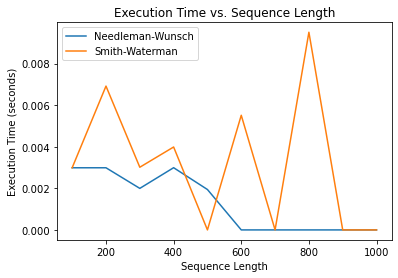

In [25]:
import time
import matplotlib.pyplot as plt

# Initialize variables
sequence_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
match_score = 1
mismatch_score = -1
gap_penalty = -1
nw_execution_times = []
sw_execution_times = []

# Run the algorithms and measure execution time
for length in sequence_lengths:
    # Generate sequences from the provided dataset
    seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
    seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"


    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Plot Execution Time vs. Sequence Length
plt.plot(sequence_lengths, nw_execution_times, label="Needleman-Wunsch")
plt.plot(sequence_lengths, sw_execution_times, label="Smith-Waterman")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Execution Time vs. Sequence Length")
plt.show()


In [35]:
import time
import matplotlib.pyplot as plt
import random
from Bio import SeqIO


# Step 1: Define Dataset Sizes or Sequence Lengths
sequence_lengths = [100, 200, 300, 400, 500]

# Step 2: Generate or Load Sequences
# If generating random sequences:
def generate_random_sequence(length):
    bases = ['A', 'C', 'G', 'T']
    sequence = ''.join(random.choices(bases, k=length))
    return sequence

# Example usage
sequence_length = 100
random_sequence = generate_random_sequence(sequence_length)
print(random_sequence)

# If loading sequences from a dataset:
def load_sequences_from_file(file_path, sequence_length):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        if len(record.seq) >= sequence_length:
            sequence = str(record.seq)[:sequence_length]
            sequences.append(sequence)
    return sequences


# Example usage
file_path = "C:\\Users\\bnand\\Documents\\SEM 4\\BIO\\BOPP01000041.1 Gryllus bimaculatus .fasta"
sequence_length = 100
sequences = load_sequences_from_file(file_path, sequence_length)
for sequence in sequences:
    print(sequence)

# Step 3: Measure Execution Time
nw_execution_times = []
sw_execution_times = []

for length in sequence_lengths:
    # Generate or load sequences of the specified length
    seq1 = generate_random_sequence(length)
    seq2 = generate_random_sequence(length)

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Step 4: Plot Execution Time
plt.plot(sequence_lengths, nw_execution_times, label="Needleman-Wunsch")
plt.plot(sequence_lengths, sw_execution_times, label="Smith-Waterman")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Execution Time vs. Sequence Length")
plt.show()


ModuleNotFoundError: No module named 'Bio'